In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.txt", sep=',')

### Preperation

In [6]:
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [3]:
df.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
 3   Старше 35                   237 non-null    bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 5.9+ KB


In [29]:
df['Пол'].value_counts()

М    139
Ж     98
Name: Пол, dtype: int64

В данном случае нет аномалий в данных. Теперь для удобства разделим наши данные

In [81]:
# Разделение данных на группы по полу
male_data = df[(df['Пол'] == 'М') & (df['Количество больничных дней'] >= 2)]
female_data = df[(df['Пол'] == 'Ж') & (df['Количество больничных дней'] >= 2)]
# Разделение данных на группы по возрасту
older_data = df[df['Возраст'] > 35]
younger_data = df[df['Возраст'] <= 35]

df['Старше 35'] = df['Возраст'].apply(lambda x: 'Да' if x >=35 else 'Нет')

In [82]:
df['Старше 35'].value_counts()

Да     191
Нет     46
Name: Старше 35, dtype: int64

### Plots

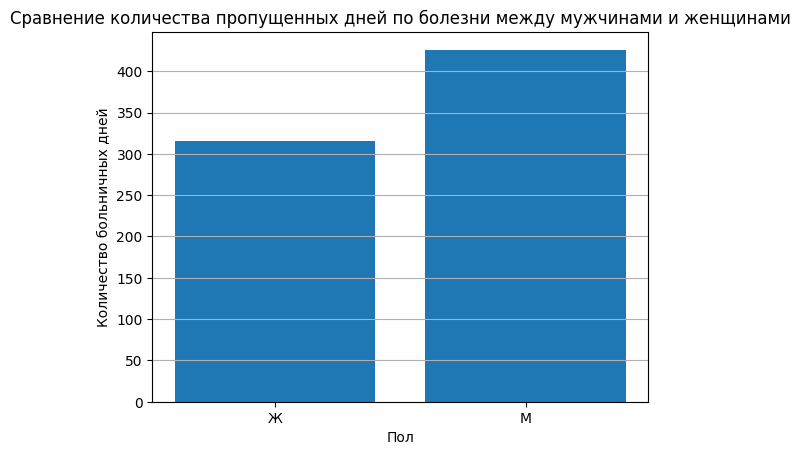

In [83]:
# Группировка данных по полу и суммирование количества пропущенных дней
gender_counts = df[df['Количество больничных дней'] >= 2].groupby('Пол')['Количество больничных дней'].sum()

# Создание столбчатой диаграммы
plt.bar(gender_counts.index, gender_counts)
plt.xlabel('Пол')
plt.ylabel('Количество больничных дней')
plt.title('Сравнение количества пропущенных дней по болезни между мужчинами и женщинами')
plt.grid(axis='y')
plt.show()

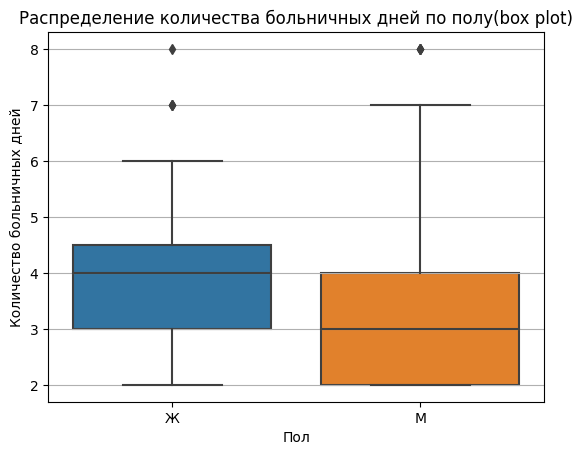

In [84]:
sns.boxplot(x='Пол', y='Количество больничных дней', data=df[df['Количество больничных дней'] >= 2])
plt.title('Распределение количества больничных дней по полу(box plot)')
plt.xlabel('Пол')
plt.ylabel('Количество больничных дней')
plt.grid(axis='y')
plt.show()

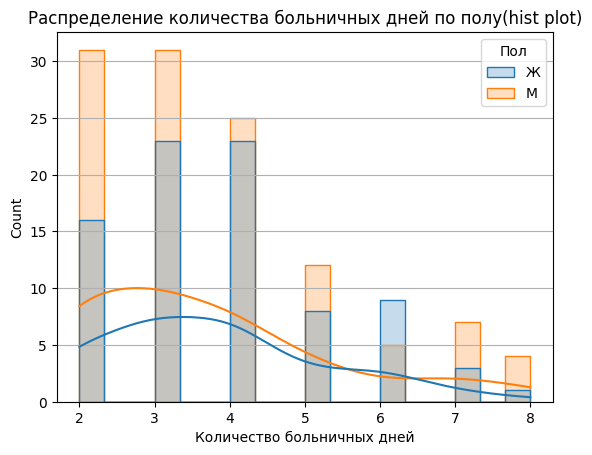

In [85]:
sns.histplot(data=df[df['Количество больничных дней'] >= 2], x='Количество больничных дней', hue='Пол', element='step', kde=True)
plt.title('Распределение количества больничных дней по полу(hist plot)')
plt.grid(axis='y')
plt.show()


Из этих графиков можно сделать вывод, что данные распределены примерно одинаково. Сделаем аналогичные графики, но для второй задачи(старше и младше 35 лет)

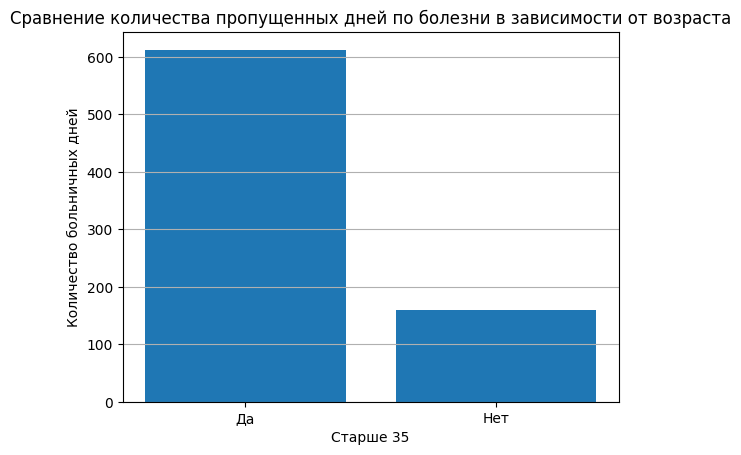

In [87]:
# Группировка данных по возрасту и суммирование количества пропущенных дней
gender_counts = df.groupby('Старше 35')['Количество больничных дней'].sum()

# Создание столбчатой диаграммы
plt.bar(gender_counts.index, gender_counts)
plt.xlabel('Старше 35')
plt.ylabel('Количество больничных дней')
plt.title('Сравнение количества пропущенных дней по болезни в зависимости от возраста')
plt.grid(axis='y')
plt.show()

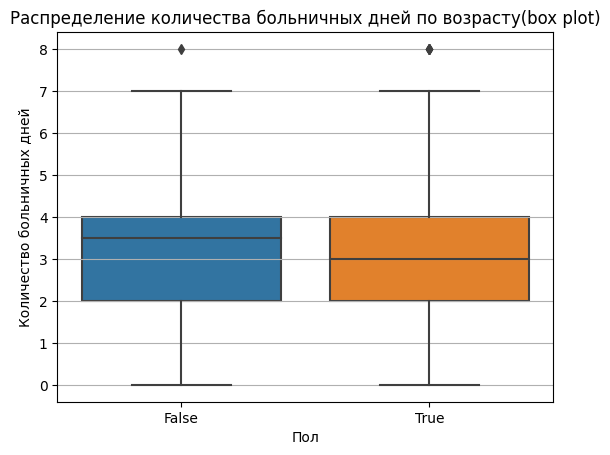

In [77]:
sns.boxplot(x='Старше 35', y='Количество больничных дней', data=df)
plt.title('Распределение количества больничных дней по возрасту(box plot)')
plt.xlabel('Пол')
plt.ylabel('Количество больничных дней')
plt.grid(axis='y')
plt.show()

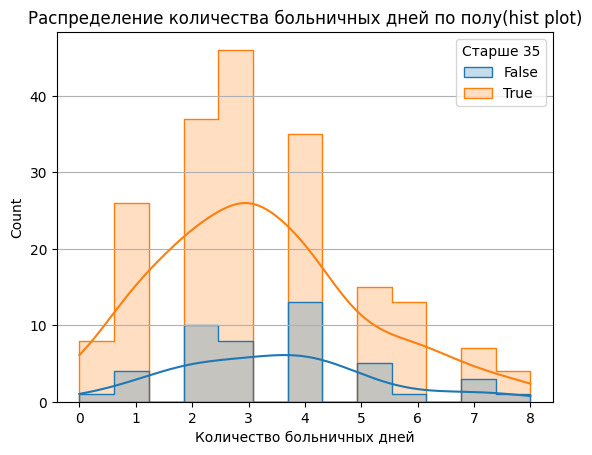

In [78]:

sns.histplot(data=df, x='Количество больничных дней', hue='Старше 35', element='step', kde=True)
plt.title('Распределение количества больничных дней по возрасту(hist plot)')
plt.grid(axis='y')
plt.show()

Вывод аналогичны. Далее проведем t-тест. Т.к выборка достаточно большая(больше 30 в каждой группе) можно положиться на ЦПТ и не проверять распределения на нормальность.

### Statistics

In [79]:
# Проведение t-теста для групп по полу
t_statistic, p_value = stats.ttest_ind(male_data['Количество больничных дней'], female_data['Количество больничных дней'])

if p_value < 0.05:
    print(f"p_value = {p_value}:\nСтатистически значимая разница между мужчинами и женщинами.")
else:
    print(f"p_value = {p_value}:\nНет статистически значимой разницы между мужчинами и женщинами.")


# Проведение t-теста для групп по возрасту
t_statistic, p_value = stats.ttest_ind(older_data['Количество больничных дней'], younger_data['Количество больничных дней'])

if p_value < 0.05:
    print(f"p_value = {p_value}:\nСтатистически значимая разница между сотрудниками старше 35 лет и моложе 35 лет.")
else:
    print(f"p_value = {p_value}:\nНет статистически значимой разницы между сотрудниками старше 35 лет и моложе 35 лет.")

p_value = 0.6468019531365763:
Нет статистически значимой разницы между мужчинами и женщинами.
p_value = 0.6550973822138465:
Нет статистически значимой разницы между сотрудниками старше 35 лет и моложе 35 лет.
